In [1]:
import warnings                       # to hide warnings if any
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline


In [2]:
# Veri Kümemizi Yükleyelim
df = pd.read_csv('datasets_180_408_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#id ve Unnamde sütunlarını siliyoruz
df = df.drop(['id', 'Unnamed: 32'], axis = 1)

In [4]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.shape
#Veri kümemiz 1 tane class 30 tane özellik sütunundan oluşuyor

(569, 31)

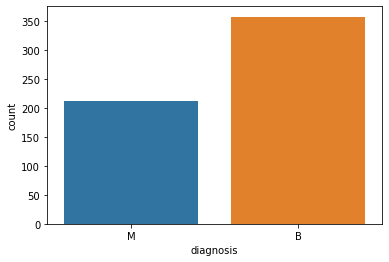

In [6]:
sns.countplot(df['diagnosis'],label="Count")
# M = kötü huylu, B = iyi huylu

Converting the diagnosis value of M and B to a numerical value
M (Malignant) = 1
B (Benign) = 0

In [7]:
# Veri kümemizde null değer var mı kontrol ediyoruz
df.isnull().sum().head()

diagnosis         0
radius_mean       0
texture_mean      0
perimeter_mean    0
area_mean         0
dtype: int64

In [8]:
# diagnis sınıfında ki iyi huyluyu = 1, kötü huyluyu = 0 olarak değiştirdik

def diagnosis_value(diagnosis):
    if diagnosis == 'M':
        return 1
    else:
        return 0

df['diagnosis'] = df['diagnosis'].apply(diagnosis_value)

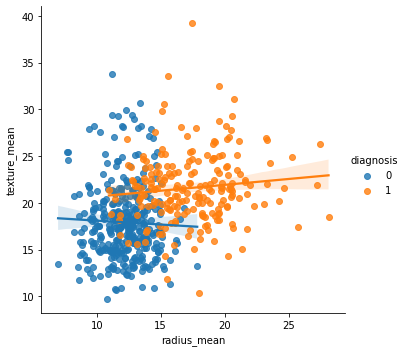

In [9]:
sns.lmplot(x = 'radius_mean', y= 'texture_mean', hue = 'diagnosis',data = df)

# iyi ve kötü huylu hücrelerin doku ve yarıçap ortalamalarının veri kümemizdeki dağılımı

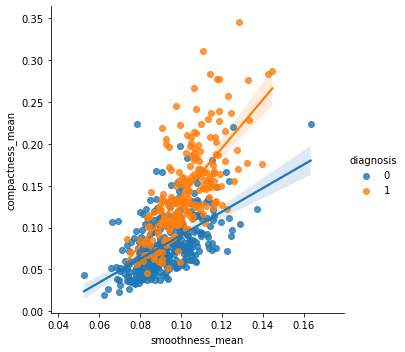

In [10]:
sns.lmplot(x='smoothness_mean', y = 'compactness_mean', data = df, hue = 'diagnosis')

# iyi ve kötü huylu hücrelerin yoğunluk ve pürüzsüzlük ortalamalarının veri kümemizdeki dağılımı

In [11]:
X = np.array(df.iloc[:,1:])
y = np.array(df['diagnosis'])

# X değerine veri kümemizdeki özellikleri veriyoruz
# y değerine veri kümemizin sınıf bilgisini veriyoruz

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

# Veri kümemizi test ve train olarak ayırıyoruz

In [13]:
# KNeighborsClassifier öğesini içindeki bağımsız değişkeni kullanarak veri noktamızın kaç tane 
# en yakın komşuya bakmasını istediğimizi belirleriz.

# fit ile eğitim yapıyoruz

knn = KNeighborsClassifier(n_neighbors = 13)
history = knn.fit(X_train,y_train)

In [14]:
# Score, test verilerinin etiketlerdeki ortalama doğruluğu döndürün.

knn.score(X_test,y_test)

0.9627659574468085

In [15]:
neighbors = []
cv_scores = []
from sklearn.model_selection import cross_val_score

# n_neighbors değerini 1 den 50 kadar değer verip her n_neighbors değerini 
# 10 defa geçer ortalama değeri cv_scores dizisine ekliyoruz

for k in range(1,51,1):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,X_train,y_train,cv=10, scoring = 'accuracy')
    cv_scores.append(scores.mean())
  

The optimal number of neighbors is 2 


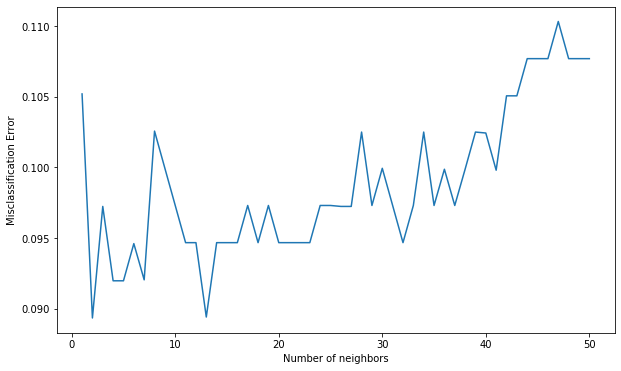

In [16]:
# Her n_neighbors değerinin ortalama değerini cv_scores dizinden alıp 1 çıkarıp MSE dizine verdik.

MSE = [1-x for x in cv_scores]

# MSE dizisindeki en küçük değerin index değerini optimal_k değerine verdik
# En küçük MSE değeri aslında bizim en yüksek doğruluk sonucumuzdur

optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is %d ' %optimal_k)

#plot misclassification error versus k

plt.figure(figsize = (10,6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()

# neighbor sayısına göre yanlış sınıflandırma değerleri grafikte gösterilmiştir 

# En iyi sonucu hangi neighbor değerinde aldığı gösterilmiştir

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x29c7d5a3348>)

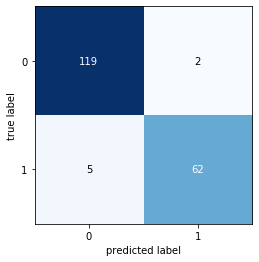

In [17]:
# Confusion matrix oluşturuyoruz
from sklearn.metrics import confusion_matrix
import itertools
from mlxtend.plotting import plot_confusion_matrix


# x_test'in tahmin sonuçlarını alıyoruz
y_pred = history.predict(X_test)
# confusion matrix oluşturuyoruz
confusion_mtx = confusion_matrix(y_test, y_pred) 
# confusion matrix çiziyoruz
plot_confusion_matrix(confusion_mtx)

# iyi huyluyu = 1, kötü huyluyu = 0

In [18]:
# pip install mlxtend